In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [58]:
def rep_lorentz(delta, delta0, gamma, A, offset):
    return (A/(2*np.pi)) * gamma/((delta - delta0 + 80)**2 + (gamma/2)**2) + \
           (A/(2*np.pi)) * gamma/((delta - delta0 - 80)**2 + (gamma/2)**2) + \
           (A/(2*np.pi)) * gamma/((delta - delta0)**2 + (gamma/2)**2) + offset
def lorentz(delta, delta0, gamma, A, offset):
    return (A/(2*np.pi)) * gamma/((delta - delta0)**2 + (gamma/2)**2) + offset

In [36]:
x = np.linspace(-100,100, 1000)
y = rep_lorentz(x, 0.0, 20.0, 400.0, 100)

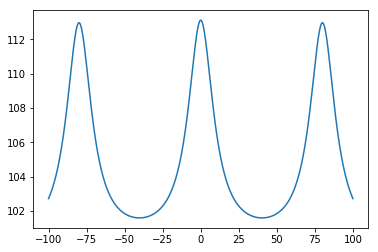

In [37]:
plt.plot(x, y)

In [10]:
def data_average(preamble, experiment, datasets):
    for i, item in enumerate(datasets):
        item = str(item)
        if len(item) < 5:
            item = (5 -len(item))*'0' + item
        temp = np.loadtxt(preamble + item  + ' - ' + experiment + '.csv', delimiter=',')
        if i != 0:
            prev_y = temp[:,1] + prev_y
        else:
            x_values = temp[:,0]
            prev_y = temp[:,1]
    y_values = prev_y/len(datasets)
    return [x_values, y_values]

In [11]:
x1, y1 = data_average('/home/qsimexpcontrol/LabRAD/data/MLpiezoscan.dir/', 'MLpiezoscan',plt.plot(x,y, x+80, y, x-80, y) range(825,827))
x2, y2 = data_average('/home/qsimexpcontrol/LabRAD/data/MLpiezoscan.dir/', 'MLpiezoscan', range(831,833))
x3, y3 = data_average('/home/qsimexpcontrol/LabRAD/data/MLpiezoscan.dir/', 'MLpiezoscan', range(834,836))
x4, y4 = data_average('/home/qsimexpcontrol/LabRAD/data/MLpiezoscan.dir/', 'MLpiezoscan', range(839,841))
x5, y5 = data_average('/home/qsimexpcontrol/LabRAD/data/MLpiezoscan.dir/', 'MLpiezoscan', range(842,844))

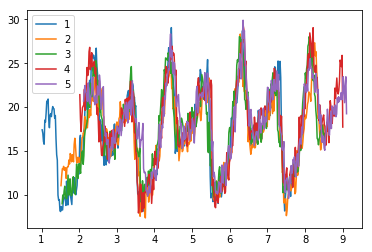

In [12]:
plt.plot(x1[1:],y1[1:], label = '1')
plt.plot(x2[1:] + 0.5,y2[1:], label = '2')
plt.plot(x3[1:] + 0.53,y3[1:], label = '3')
plt.plot(x4[1:] + 1,y4[1:], label = '4')
plt.plot(x5[1:] + 1.1,y5[1:], label = '5')
plt.legend(loc=0)

<IPython.core.display.Javascript object>


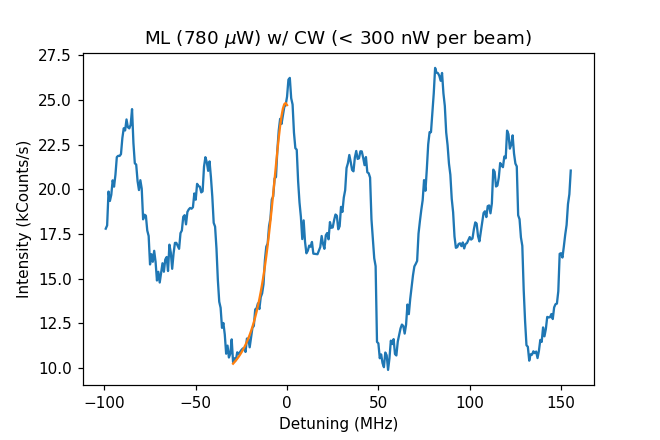

[  4.39260716   0.46290712  11.88890558   8.47116941]


In [100]:
%matplotlib notebook
y_avg = (y1[64:] + y2[35:372] + y3[33:370] + y4[6:343] + y5[:337])/5.0
x_avg = x1[64:]
leftside_x = x_avg[92:132]
leftside_y = y_avg[92:132]
lorentzfit, pcov1 = curve_fit(lorentz, leftside_x,leftside_y, p0=[4.0, 2.0, 15.0, 10])
plt.plot(x_avg/0.0231 - 191, y_avg)
plt.plot(leftside_x/0.0231 - 191, lorentz(leftside_x, lorentzfit[0], lorentzfit[1], lorentzfit[2], lorentzfit[3]))
print lorentzfit
plt.xlabel('Detuning (MHz)')
plt.ylabel('Intensity (kCounts/s)')
plt.title('ML (780 $\mu$W) w/ CW (< 300 nW per beam)')
plt.savefig(plt.savefig('/home/qsimexpcontrol/plots/ML_Laser/2JUN2017spectra_lorentz_fit.pdf'))

In [96]:
0.4629/0.0231

20.038961038961038